**The goal is to figure out which handwritten digits are most differentiated and easily separable from the rest with visualization of variables obtained with Principal Component Analysis.**

data source: https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
digits = pd.read_csv('digits.csv')

In [3]:
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [4]:
df = digits.drop('number_label',axis=1)

**I am goint to visualize the number drawn with the pixel array plotting:**

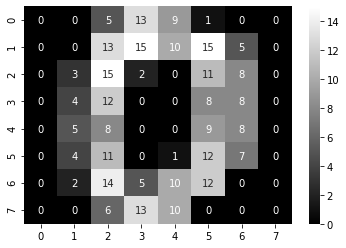

In [5]:
sns.heatmap(np.array(df.iloc[0]).reshape(8,8),annot=True,cmap='gray');

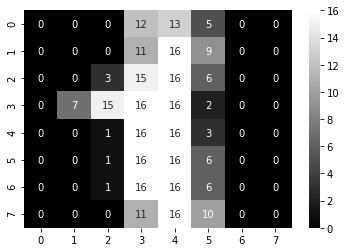

In [6]:
sns.heatmap(np.array(df.iloc[1]).reshape(8,8),annot=True,cmap='gray');

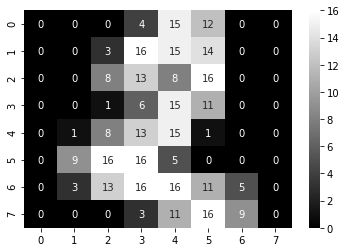

In [7]:
sns.heatmap(np.array(df.iloc[2]).reshape(8,8),annot=True,cmap='gray');

**I am going to scale the data:**

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

**I am going to perform the PCA on the scaled pixel data set with 2 components:**

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_X)

**I am going to check how much variance is explained by 2 principal components:**

In [10]:
#CODE HERE
np.round(np.sum(pca.explained_variance_ratio_),2)

0.22

**I am going to create a scatterplot of the digits in the 2 dimensional PCA space and color it based based on the digit label:**

In [11]:
pca_df = pd.DataFrame(principal_components,columns=['Principal Component 1','Principal Component 2'])
pca_df['label']=digits['number_label']

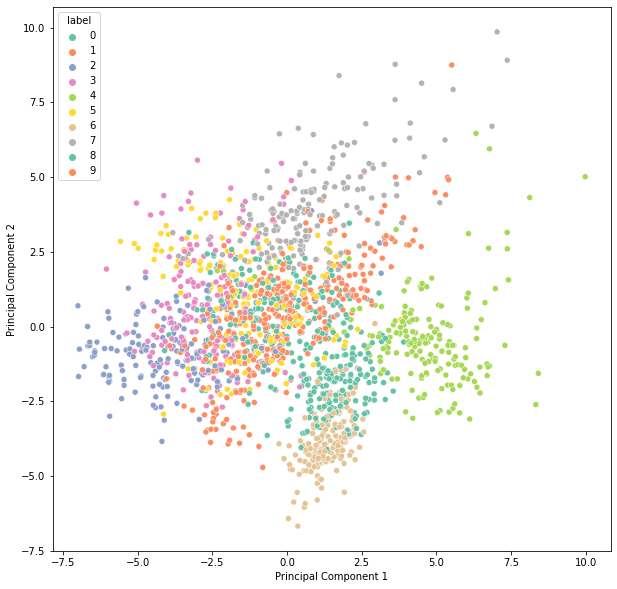

In [12]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=pca_df,x='Principal Component 1',y='Principal Component 2',hue='label',palette='Set2');

**It can be observed that digit #4 is quite distinctible from the rests of the digits.**

**Digit #1 is difficult to distinct from the rest of the digits.**

**Digits #6 and #8 are simmilar.**

## Thank you.